##Importing packages

In [95]:
!pip install mnist
import numpy as np
import matplotlib.pyplot as plt
import mnist

##Loading Data

In [96]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = train_images[:1024]
print(train_images.shape)
train_labels = train_labels[:1024]
print(train_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(1024, 28, 28)
(1024,)


##Normalizing data

In [97]:
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')
train_images /= 255
test_images /= 255

##Flattening the data

In [98]:
feature_vector_length = train_images.shape[1]*train_images.shape[2]
print(feature_vector_length)

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
train_images = train_images.reshape(train_images.shape[0], feature_vector_length)
test_images = test_images.reshape(test_images.shape[0], feature_vector_length)
print(train_images.shape)
print(test_images.shape)

784
(1024, 784)
(10000, 784)


##Converting labels to decimal ascii value

In [99]:
train_labels_ascii = np.copy(train_labels)
for index, value in np.ndenumerate(train_labels_ascii):
    train_labels_ascii[index] = ord(str(train_labels_ascii[index]))
test_labels_ascii = np.copy(test_labels)
for index, value in np.ndenumerate(test_labels_ascii):
    test_labels_ascii[index] = ord(str(test_labels_ascii[index]))

In [100]:
train_labels_ascii

array([53, 48, 52, ..., 51, 55, 55], dtype=uint8)

##Converting decimal ascii values to binary 6 bit

In [101]:
vfunc = np.vectorize(lambda i: '{0:06b}'.format(i))
binary_train_labels = vfunc(train_labels_ascii)
binary_test_labels = vfunc(test_labels_ascii)

In [102]:
binary_train_labels

array(['110101', '110000', '110100', ..., '110011', '110111', '110111'],
      dtype='<U6')

##Dividing each bit as a column

In [103]:
binary_train_labels = binary_train_labels.view('U1').reshape(binary_train_labels.shape[0],6)
binary_test_labels = binary_test_labels.view('U1').reshape(binary_test_labels.shape[0],6)

binary_train_labels = binary_train_labels.astype('int')
binary_test_labels = binary_test_labels.astype('int')

In [104]:
binary_train_labels

array([[1, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0],
       ...,
       [1, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1]])

##Removing first 2 bits because of redundancy

In [105]:
binary_train_labels = binary_train_labels[:,2:]
binary_test_labels = binary_test_labels[:,2:]

In [107]:
binary_train_labels.shape

(1024, 4)

##Network implementation

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# X=train_images[:2000]
# Y=binary_train_labels[:2000]

X=train_images
Y=binary_train_labels

# model specifications
Ni=784; Nh1=392; Nh2=196; No=4;

#parameter and array initialization
Ntrials=100
wh1=np.random.randn(784,392); dwh1=np.zeros(wh1.shape)
wh2=np.random.randn(392,196); dwh2=np.zeros(wh2.shape) 
wo=np.random.randn(196,4); dwo=np.zeros(wo.shape) 
error=np.array([])
loss = np.array([])

init_wh1 = wh1
init_wh2 = wh2
init_wo = wo

for trial in range(Ntrials):
    h1=1/(1+np.exp(-(X.dot(wh1)))) #hidden activation for all pattern y=1/(1+np.exp(-X.dot(wo)))
    h2=1/(1+np.exp(-(h1.dot(wh2))))
    y=1/(1+np.exp(-(h2.dot(wo)))) #output for all pattern y=1/(1+np.exp(-X.dot(wo)))

    do=y*(1-y)*(Y-y)  # delta output
    dh2=h2*(1-h2)*(do.dot(wo.T)) #(do@wo.transpose())  # delta backpropagated  
    dh1=h1*(1-h1)*(dh2.dot(wh2.T))

    # update weights with momentum
    dwo=0.9*dwo+h2.T.dot(do) #@do  #dwo=0.9*dwo+((X.T).dot(do)) #do@X.T
    wo=wo+0.005*dwo
    dwh2=0.9*dwh2+(h1.T.dot(dh2))
    wh2=wh2 + 0.005*dwh2
    dwh1=0.9*dwh1+(X.T.dot(dh1))
    wh1=wh1 + 0.005*dwh1
    
    error=np.append(error,np.sum(abs(Y-y))/X.shape[0])
    loss=np.append(loss,np.sum((Y-y)**2)/X.shape[0])
    print('MSE for ', trial, ' = ', loss[trial])



MSE for  0  =  1.3826630130206499
MSE for  1  =  1.3024722563629854
MSE for  2  =  1.21353758771241
MSE for  3  =  1.1179100272842526
MSE for  4  =  0.9828133123986134
MSE for  5  =  0.9039206219413338
MSE for  6  =  0.8103287216376294
MSE for  7  =  0.7327792296662508
MSE for  8  =  0.6957603311574725
MSE for  9  =  0.665171343646587
MSE for  10  =  0.5779898813220181
MSE for  11  =  0.5924357061631551
MSE for  12  =  0.6416121492930528
MSE for  13  =  0.6126649121226734
MSE for  14  =  0.4533935496588445
MSE for  15  =  0.5756300203568512
MSE for  16  =  0.5355545131192577
MSE for  17  =  0.6128093662976056
MSE for  18  =  0.5211011443077547
MSE for  19  =  0.3817354263841404
MSE for  20  =  0.583860128546039
MSE for  21  =  0.36495859197970926
MSE for  22  =  0.41346206823231246
MSE for  23  =  0.44863156043384733
MSE for  24  =  0.39716098396838256
MSE for  25  =  0.3316092683374443
MSE for  26  =  0.38728911875544214
MSE for  27  =  0.3564210046916454
MSE for  28  =  0.31331021282

##Plotting error

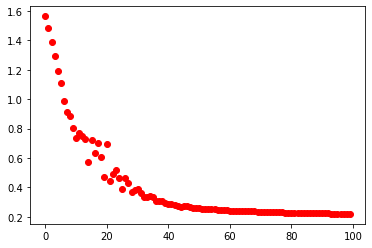

In [122]:
x = np.asarray([x for x in range(len(error))])
plt.plot([x], [error], 'ro')
plt.show()

In [123]:
test = np.random.rand(10)
test[test<0.5]

array([0.02986787, 0.40552306, 0.28222964])

In [124]:
np.where(y>0.5, 1, 0)

array([[0, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1]])

In [125]:
binary_train_labels

array([[0, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1]])

In [126]:
np.where(y>0.5, 1, 0) - Y

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

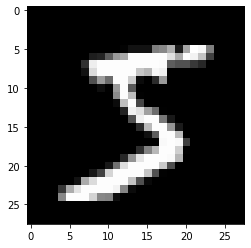

In [127]:
test = X[0, :].T.reshape([28, 28]);
plt.gray()
plt.imshow(test)

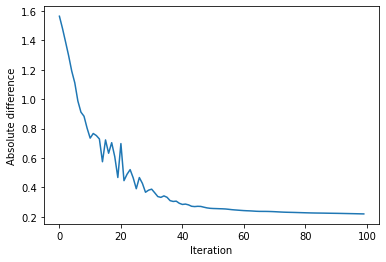

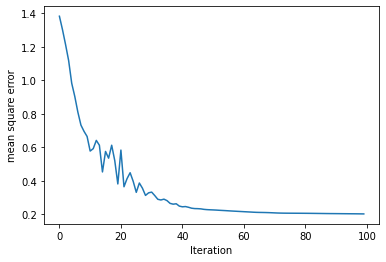

In [128]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(error)
plt.show()
plt.xlabel("Iteration")
plt.ylabel("mean square error")
plt.plot(loss)
plt.show()

##Testing noise on testdata

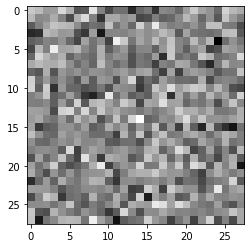

In [130]:
#noise
noise = np.random.normal(0, 1000, test_images.shape)
noised_test_images = test_images + noise

test = noised_test_images[0, :].reshape([28, 28]);
plt.gray()
plt.imshow(test)
# plt.imshow(test_images[0,:].reshape([28,28]))

In [131]:
np.where(yp[0]>0.5, 1, 0)

array([0, 1, 0, 1])

In [132]:
test_labels_ascii

array([55, 50, 49, ..., 52, 53, 54], dtype=uint8)

In [133]:
binary_test_labels

array([[0, 1, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0]])

## Testing noise on train data

In [134]:
#noise
noise = np.random.normal(0, 1000, train_images.shape)
noised_train_images = train_images + noise

#prediction for noised images
hp1=1/(1+np.exp(-noised_train_images.dot(wh1))) #h1p=1/(1+np.exp(-X.dot(wh1))
hp2=1/(1+np.exp(-hp1.dot(wh2))) #h2p=1/(1+np.exp(-h1.dot(wh2)))
yp=1/(1+np.exp(-hp2.dot(wo)))
lossp=np.sum((binary_train_labels-yp)**2)/X.shape[0]
lossp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


1.548378965014578

In [135]:
np.where(yp[0]>0.1, 1 , 0)

array([0, 1, 0, 1])

In [136]:
binary_train_labels[0]

array([0, 1, 0, 1])

##Prediction for test data

In [137]:
#prediction for test data
hp1=1/(1+np.exp(-test_images.dot(wh1))) #h1p=1/(1+np.exp(-X.dot(wh1))
hp2=1/(1+np.exp(-hp1.dot(wh2))) #h2p=1/(1+np.exp(-h1.dot(wh2)))
yp=1/(1+np.exp(-hp2.dot(wo)))
lossp=np.sum((binary_test_labels-yp)**2)/test_images.shape[0]
lossp

0.5381436970495191

In [138]:
np.where(yp[5]>0.5, 1, 0)

array([0, 0, 0, 1])

In [139]:
binary_test_labels[5]

array([0, 0, 0, 1])

## Addig noise for test images and predicting

In [140]:
#noise
noise = np.random.normal(0, 1000, test_images.shape)
noised_test_images = test_images + noise

#prediction for noised images
hp1=1/(1+np.exp(-noised_test_images.dot(wh1))) #h1p=1/(1+np.exp(-X.dot(wh1))
hp2=1/(1+np.exp(-hp1.dot(wh2))) #h2p=1/(1+np.exp(-h1.dot(wh2)))
yp=1/(1+np.exp(-hp2.dot(wo)))
lossp=np.sum((binary_test_labels-yp)**2)/X.shape[0]
lossp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


15.466155597407697

In [ ]:
# plt.gray()
# plt.imshow(X[:,pat])
X[:,10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.36862745, 0.99215686, 0.99215686, 0.41960784,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09411765, 0.83529412, 0.99215686, 0.99215686, 0.51764706,
       0.        , 0.        , 0.        ])

In [ ]:
x.shape

(1024,)

##Using only one hidden layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X=train_images
Y=binary_train_labels
X = X.T
Y = Y.T
# model specifications
Ni=784; Nh=100; No=4;

#parameter and array initialization
Ntrials=100
wh=np.random.randn(Nh,Ni); dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.9*dwo+do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh + 0.1*dwh
    
    error=np.append(error,np.sum(abs(Y-y)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


In [ ]:
X.shape

(784, 1024)

In [ ]:
wh.shape

(100, 784)

##LASSO Generalization L1

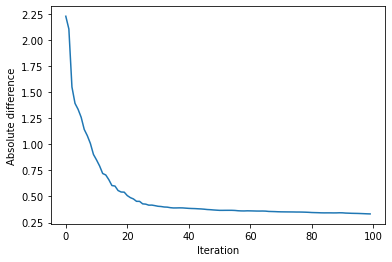

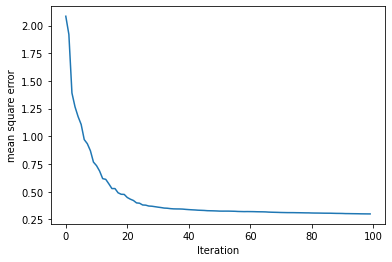

In [141]:
X=train_images
Y=binary_train_labels

# model specifications
Ni=784; Nh1=392; Nh2=196; No=4;

#parameter and array initialization
Ntrials=100
wh1=np.random.randn(784,392); dwh1=np.zeros(wh1.shape)
wh2=np.random.randn(392,196); dwh2=np.zeros(wh2.shape) 
wo=np.random.randn(196,4); dwo=np.zeros(wo.shape) 
error=np.array([])
loss = np.array([])

init_wh1 = wh1
init_wh2 = wh2
init_wo = wo

lambd = 0.02
alpha = 0.005

for trial in range(Ntrials):     
    h1=1/(1+np.exp(-(X.dot(wh1)))) #hidden activation for all pattern y=1/(1+np.exp(-X.dot(wo)))
    h2=1/(1+np.exp(-(h1.dot(wh2))))
    y=1/(1+np.exp(-(h2.dot(wo)))) #output for all pattern y=1/(1+np.exp(-X.dot(wo)))

    do=y*(1-y)*(Y-y)  # delta output
    dh2=h2*(1-h2)*(do.dot(wo.T)) #(do@wo.transpose())  # delta backpropagated  
    dh1=h1*(1-h1)*(dh2.dot(wh2.T))

    # update weights with momentum
    dwo=0.9*dwo+h2.T.dot(do) #@do  #dwo=0.9*dwo+((X.T).dot(do)) #do@X.T
    wo=wo + (2*lambd*np.sign(wo)) + alpha*dwo # wo=wo+0.005*dwo
    dwh2=0.9*dwh2+(h1.T.dot(dh2))
    wh2=wh2 + (2*lambd*np.sign(wh2)) + alpha*dwh2 # wh2=wh2 + 0.005*dwh2
    dwh1=0.9*dwh1+(X.T.dot(dh1))
    wh1=wh1 + (2*lambd*np.sign(wh1)) + alpha*dwh1 # wh1=wh1 + 0.005*dwh1
    
    error=np.append(error,np.sum(abs(Y-y))/X.shape[0])
    loss=np.append(loss,np.sum((Y-y)**2)/X.shape[0])

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(error)
plt.show()
plt.xlabel("Iteration")
plt.ylabel("mean square error")
plt.plot(loss)
plt.show()

##Ridge Generalization L2

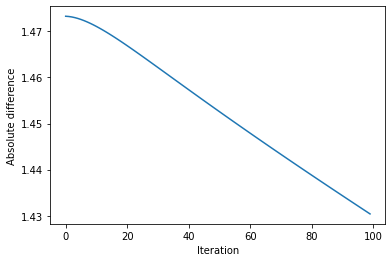

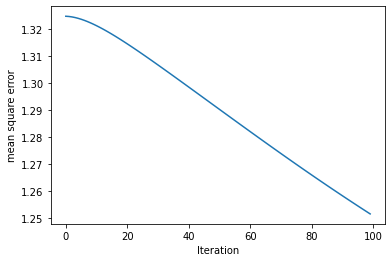

In [145]:
X=train_images
Y=binary_train_labels

# model specifications
Ni=784; Nh1=392; Nh2=196; No=4;

#parameter and array initialization
Ntrials=100
wh1=np.random.randn(784,392); dwh1=np.zeros(wh1.shape)
wh2=np.random.randn(392,196); dwh2=np.zeros(wh2.shape) 
wo=np.random.randn(196,4); dwo=np.zeros(wo.shape) 
error=np.array([])
loss = np.array([])

init_wh1 = wh1
init_wh2 = wh2
init_wo = wo

lambd = 0.02
alpha = 0.005
N = X.shape[0]

for trial in range(Ntrials):     
    h1=1/(1+np.exp(-(X.dot(wh1)))) #hidden activation for all pattern y=1/(1+np.exp(-X.dot(wo)))
    h2=1/(1+np.exp(-(h1.dot(wh2))))
    y=1/(1+np.exp(-(h2.dot(wo)))) #output for all pattern y=1/(1+np.exp(-X.dot(wo)))

    do=y*(1-y)*(Y-y)  # delta output
    dh2=h2*(1-h2)*(do.dot(wo.T)) #(do@wo.transpose())  # delta backpropagated  
    dh1=h1*(1-h1)*(dh2.dot(wh2.T))

    # update weights with momentum
    dwo=0.9*dwo+h2.T.dot(do) #@do  #dwo=0.9*dwo+((X.T).dot(do)) #do@X.T
    wo=wo + (1/N)*alpha*dwo # wo=wo+0.005*dwo
    dwh2=0.9*dwh2+(h1.T.dot(dh2))
    wh2=wh2 + (1/N)*alpha*dwh2 # wh2=wh2 + 0.005*dwh2
    dwh1=0.9*dwh1+(X.T.dot(dh1))
    wh1=wh1 + (1/N)*alpha*dwh1 # wh1=wh1 + 0.005*dwh1
    
    error=np.append(error,np.sum(abs(Y-y))/X.shape[0])
    loss=np.append(loss,np.sum((Y-y)**2)/X.shape[0])

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(error)
plt.show()
plt.xlabel("Iteration")
plt.ylabel("mean square error")
plt.plot(loss)
plt.show()